# Classificação

In [ ]:
# @title 1. IMPORTA AS BIBLIOTECAS

import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics as mt
from sklearn import tree
from sklearn import ensemble as en
from sklearn import linear_model as lm

In [ ]:
# @title 2. IMPORTA O ARQUIVO X_training

from google.colab import files
uploaded = files.upload()
df_Xtraining = pd.read_csv('X_training.csv', sep=',', encoding='utf-8')

Saving X_training.csv to X_training.csv


In [ ]:
df_Xtraining=df_Xtraining.drop(['id', 'type_of_travel_personal_travel', 'gender_Female'], axis=1)

In [ ]:
df_Xtraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72515 entries, 0 to 72514
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_type                      72515 non-null  int64  
 1   age                                72515 non-null  float64
 2   class                              72515 non-null  float64
 3   flight_distance                    72515 non-null  float64
 4   inflight_wifi_service              72515 non-null  float64
 5   departure_arrival_time_convenient  72515 non-null  float64
 6   ease_of_online_booking             72515 non-null  float64
 7   gate_location                      72515 non-null  float64
 8   food_and_drink                     72515 non-null  float64
 9   online_boarding                    72515 non-null  float64
 10  seat_comfort                       72515 non-null  float64
 11  inflight_entertainment             72515 non-null  flo

In [ ]:
# @title 2.1 IMPORTA O ARQUIVO y_training

uploaded = files.upload()
df_ytraining = pd.read_csv('y_training.csv', sep=',', encoding='utf-8')

Saving y_training.csv to y_training.csv


In [ ]:
df_ytraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72515 entries, 0 to 72514
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       72515 non-null  int64
dtypes: int64(1)
memory usage: 566.6 KB


In [ ]:
df_ytraining.value_counts(normalize=True)

,proportion
0,
0,0.5666
1,0.4334


## Training - KNN

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(df_Xtraining, df_ytraining.to_numpy().ravel())

y_pred = knn_classifier.predict(df_Xtraining)

accuracy_training = mt.accuracy_score(df_ytraining, y_pred)
precisio_training = mt.precision_score(df_ytraining, y_pred)
recall_training = mt.recall_score(df_ytraining, y_pred)
f1_training = mt.f1_score(df_ytraining, y_pred)

print(f'Acurácia: {accuracy_training}')
print(f'Precision: {precisio_training}')
print(f'Recall: {recall_training}')
print(f'F1 Score: {f1_training}')
print('\n')

Acurácia: 0.9475832586361442
Precision: 0.9700867789688616
Recall: 0.9070255822833142
F1 Score: 0.9374969167776627




In [ ]:
# @title 2.2 IMPORTA O ARQUIVO X_validation

uploaded = files.upload()
df_Xvalidation = pd.read_csv('X_validation.csv', sep=',', encoding='utf-8')

Saving X_validation.csv to X_validation.csv


In [ ]:
df_Xvalidation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31079 entries, 0 to 31078
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 31079 non-null  int64  
 1   customer_type                      31079 non-null  int64  
 2   age                                31079 non-null  float64
 3   class                              31079 non-null  float64
 4   flight_distance                    31079 non-null  float64
 5   inflight_wifi_service              31079 non-null  float64
 6   departure_arrival_time_convenient  31079 non-null  float64
 7   ease_of_online_booking             31079 non-null  float64
 8   gate_location                      31079 non-null  float64
 9   food_and_drink                     31079 non-null  float64
 10  online_boarding                    31079 non-null  float64
 11  seat_comfort                       31079 non-null  flo

In [ ]:
df_Xvalidation=df_Xvalidation.drop(['id','type_of_travel_personal_travel', 'gender_Female'], axis=1)

In [ ]:
df_Xvalidation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31079 entries, 0 to 31078
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_type                      31079 non-null  int64  
 1   age                                31079 non-null  float64
 2   class                              31079 non-null  float64
 3   flight_distance                    31079 non-null  float64
 4   inflight_wifi_service              31079 non-null  float64
 5   departure_arrival_time_convenient  31079 non-null  float64
 6   ease_of_online_booking             31079 non-null  float64
 7   gate_location                      31079 non-null  float64
 8   food_and_drink                     31079 non-null  float64
 9   online_boarding                    31079 non-null  float64
 10  seat_comfort                       31079 non-null  float64
 11  inflight_entertainment             31079 non-null  flo

In [ ]:
# @title 2.3 IMPORTA O ARQUIVO y_validation

uploaded = files.upload()
df_yvalidation = pd.read_csv('y_validation.csv', sep=',', encoding='utf-8')

Saving y_validation.csv to y_validation.csv


In [ ]:
df_yvalidation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31079 entries, 0 to 31078
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       31079 non-null  int64
dtypes: int64(1)
memory usage: 242.9 KB


## Teste de Validação - KNN

In [ ]:
y_pred_val = knn_classifier.predict(df_Xvalidation)

print(f'Acurácia: {mt.accuracy_score(df_yvalidation, y_pred_val)}')
print(f'Precision: {mt.precision_score(df_yvalidation, y_pred_val)}')
print(f'Recall: {mt.recall_score(df_yvalidation, y_pred_val)}')
print(f'F1 Score: {mt.f1_score(df_yvalidation, y_pred_val)}')
print('\n')

Acurácia: 0.9160204639788925
Precision: 0.9550750146676724
Recall: 0.8460167792709185
F1 Score: 0.897244094488189




In [ ]:
k = [i for i in range (1, 60)]
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for i in k:
  knn_classifier = KNeighborsClassifier(n_neighbors=i)
  knn_classifier.fit(df_Xtraining, df_ytraining.to_numpy().ravel())

  y_pred_val2 = knn_classifier.predict(df_Xvalidation)

  acc_validation = mt.accuracy_score(df_yvalidation, y_pred_val2)
  accuracy_scores.append(acc_validation)

  precision_validation = mt.precision_score(df_yvalidation,y_pred_val2)
  precision_scores.append(precision_validation)

  recall_validation = mt.recall_score(df_yvalidation,y_pred_val2)
  recall_scores.append(recall_validation)

  f1_validation = mt.f1_score(df_yvalidation, y_pred_val2)
  f1_scores.append(f1_validation)




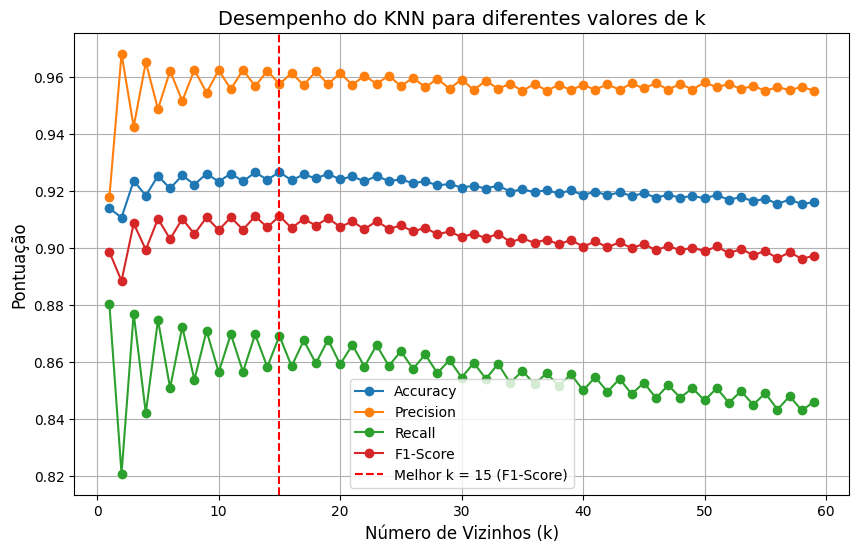

In [ ]:
import matplotlib.pyplot as plt

# Plotando as métricas
plt.figure(figsize=(10, 6))

plt.plot(k, accuracy_scores, label='Accuracy', marker='o')
plt.plot(k, precision_scores, label='Precision', marker='o')
plt.plot(k, recall_scores, label='Recall', marker='o')
plt.plot(k, f1_scores, label='F1-Score', marker='o')

# Destacando o melhor resultado de F1-Score (ou qualquer outra métrica que prefira)
best_k = k[f1_scores.index(max(f1_scores))]
best_f1 = max(f1_scores)

plt.axvline(best_k, color='red', linestyle='--', label=f'Melhor k = {best_k} (F1-Score)')

# Títulos e legendas
plt.title('Desempenho do KNN para diferentes valores de k', fontsize=14)
plt.xlabel('Número de Vizinhos (k)', fontsize=12)
plt.ylabel('Pontuação', fontsize=12)
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()


In [ ]:
# Identificando o melhor k pelo F1-Score
best_k_index = f1_scores.index(max(f1_scores))
best_k = k[best_k_index]

# Recuperando os valores das métricas para o melhor k
best_accuracy = accuracy_scores[best_k_index]
best_precision = precision_scores[best_k_index]
best_recall = recall_scores[best_k_index]
best_f1 = f1_scores[best_k_index]

# Exibindo os resultados
print(f"Melhor k: {best_k}")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"Precision: {best_precision:.4f}")
print(f"Recall: {best_recall:.4f}")
print(f"F1-Score: {best_f1:.4f}")


Melhor k: 15
Accuracy: 0.9265
Precision: 0.9574
Recall: 0.8692
F1-Score: 0.9112


## Teste para produção - KNN

In [ ]:
# @title 2.4 IMPORTA O ARQUIVO X_test

uploaded = files.upload()
df_Xtest = pd.read_csv('X_test.csv', sep=',', encoding='utf-8')

Saving X_test.csv to X_test.csv


In [ ]:
df_Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25893 entries, 0 to 25892
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25893 non-null  int64  
 1   customer_type                      25893 non-null  int64  
 2   age                                25893 non-null  float64
 3   class                              25893 non-null  float64
 4   flight_distance                    25893 non-null  float64
 5   inflight_wifi_service              25893 non-null  float64
 6   departure_arrival_time_convenient  25893 non-null  float64
 7   ease_of_online_booking             25893 non-null  float64
 8   gate_location                      25893 non-null  float64
 9   food_and_drink                     25893 non-null  float64
 10  online_boarding                    25893 non-null  float64
 11  seat_comfort                       25893 non-null  flo

In [ ]:
df_Xtest=df_Xtest.drop(['id','type_of_travel_personal_travel', 'gender_Female'], axis=1)

In [ ]:
df_Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25893 entries, 0 to 25892
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_type                      25893 non-null  int64  
 1   age                                25893 non-null  float64
 2   class                              25893 non-null  float64
 3   flight_distance                    25893 non-null  float64
 4   inflight_wifi_service              25893 non-null  float64
 5   departure_arrival_time_convenient  25893 non-null  float64
 6   ease_of_online_booking             25893 non-null  float64
 7   gate_location                      25893 non-null  float64
 8   food_and_drink                     25893 non-null  float64
 9   online_boarding                    25893 non-null  float64
 10  seat_comfort                       25893 non-null  float64
 11  inflight_entertainment             25893 non-null  flo

In [ ]:
# @title 2.5 IMPORTA O ARQUIVO y_test

uploaded = files.upload()
df_ytest = pd.read_csv('y_test.csv', sep=',', encoding='utf-8')

Saving y_test.csv to y_test.csv


In [ ]:
df_ytest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25893 entries, 0 to 25892
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       25893 non-null  int64
dtypes: int64(1)
memory usage: 202.4 KB


In [ ]:
df_ytest.value_counts(normalize=True)

,proportion
0,
0,0.561078
1,0.438922


In [ ]:
# modelo treinado
knn_last = KNeighborsClassifier(n_neighbors=15)
knn_last.fit( np.concatenate( (df_Xtraining, df_Xvalidation) ),
              np.concatenate( (df_ytraining.to_numpy().ravel(), df_yvalidation.to_numpy().ravel()) ) )

# Classificação sobre os dados de teste
y_pred_test = knn_last.predict( df_Xtest )

accuracy_test = mt.accuracy_score( df_ytest, y_pred_test )
precision_test = mt.precision_score( df_ytest, y_pred_test )
recall_test = mt.recall_score( df_ytest, y_pred_test )
f1_test = mt.f1_score( df_ytest, y_pred_test )

print(f'Acurácia: {accuracy_test} \n Precisão: {precision_test} \n Recall: {recall_test} \n F1_Score: {f1_test}')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Acurácia: 0.9283976364268335 
 Precisão: 0.9568642520895378 
 Recall: 0.8763748350197976 
 F1_Score: 0.9148525764673464


## Training - Decision Tree

In [ ]:
clf_training = tree.DecisionTreeClassifier()
clf_training = clf_training.fit(df_Xtraining, df_ytraining.to_numpy().ravel())

y_pred_tree = clf_training.predict(df_Xtraining)

tree_accuracy_training = mt.accuracy_score(df_ytraining, y_pred_tree)
tree_precision_training = mt.precision_score(df_ytraining, y_pred_tree)
tree_recall_training = mt.recall_score(df_ytraining, y_pred_tree)
tree_f1_training = mt.f1_score(df_ytraining, y_pred_tree)

print(f'Acurácia: {tree_accuracy_training} \n Precisão: {tree_precision_training} \n Recall: {tree_recall_training} \n F1_Score: {tree_f1_training}')

Acurácia: 1.0 
 Precisão: 1.0 
 Recall: 1.0 
 F1_Score: 1.0


## Teste de Validação - Decision Tree

In [ ]:
tree_y_pred_val = clf_training.predict(df_Xvalidation)

print(f'Acurácia: {mt.accuracy_score(df_yvalidation, y_pred_val)}')
print(f'Precision: {mt.precision_score(df_yvalidation, y_pred_val)}')
print(f'Recall: {mt.recall_score(df_yvalidation, y_pred_val)}')
print(f'F1 Score: {mt.f1_score(df_yvalidation, y_pred_val)}')
print('\n')

Acurácia: 0.9251906431995881
Precision: 0.9486312399355877
Recall: 0.8747494246046477
F1 Score: 0.9101935184827533




In [ ]:
values = [i for i in range (1, 60)]
tree_accuracy_scores = []
tree_precision_scores = []
tree_recall_scores = []
tree_f1_scores = []

for i in values:
  clf_training = tree.DecisionTreeClassifier(max_depth=i)
  clf_training = clf_training.fit(df_Xtraining, df_ytraining.to_numpy().ravel())

  tree_y_pred_val2 = clf_training.predict(df_Xvalidation)

  acc_validation = mt.accuracy_score(df_yvalidation, tree_y_pred_val2)
  tree_accuracy_scores.append(acc_validation)

  precision_validation = mt.precision_score(df_yvalidation,tree_y_pred_val2)
  tree_precision_scores.append(precision_validation)

  recall_validation = mt.recall_score(df_yvalidation,tree_y_pred_val2)
  tree_recall_scores.append(recall_validation)

  f1_validation = mt.f1_score(df_yvalidation, tree_y_pred_val2)
  tree_f1_scores.append(f1_validation)

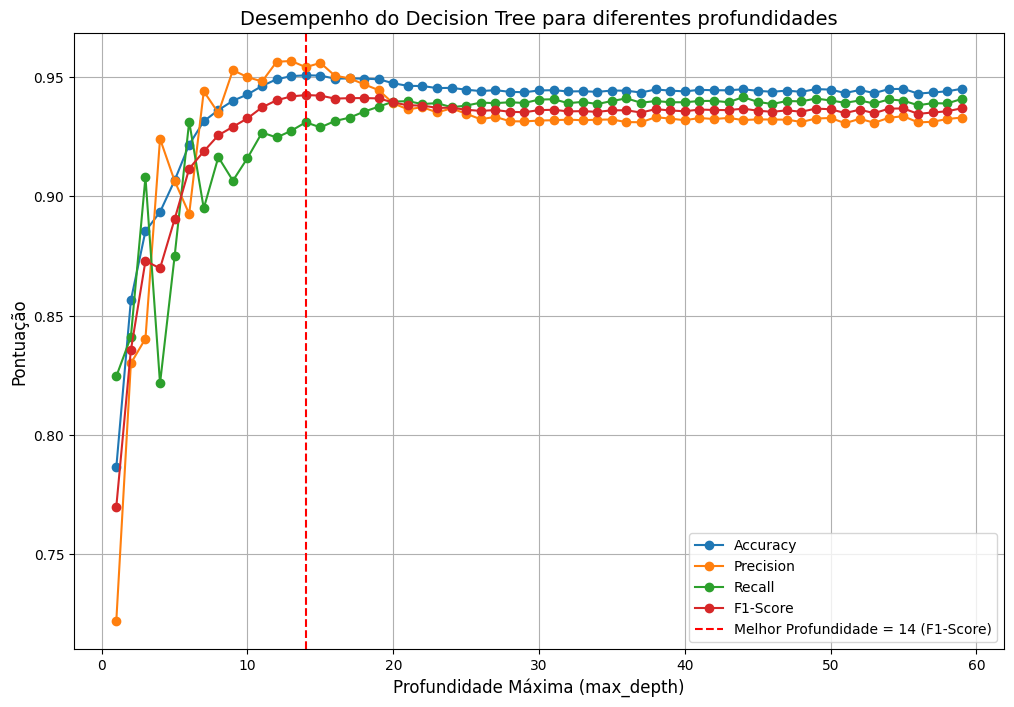

In [ ]:
import matplotlib.pyplot as plt

# Plotando as métricas
plt.figure(figsize=(12, 8))

plt.plot(values, tree_accuracy_scores, label='Accuracy', marker='o')
plt.plot(values, tree_precision_scores, label='Precision', marker='o')
plt.plot(values, tree_recall_scores, label='Recall', marker='o')
plt.plot(values, tree_f1_scores, label='F1-Score', marker='o')

# Destacando o melhor F1-Score e a profundidade correspondente
best_depth = values[tree_f1_scores.index(max(tree_f1_scores))]
best_f1 = max(tree_f1_scores)
plt.axvline(best_depth, color='red', linestyle='--', label=f'Melhor Profundidade = {best_depth} (F1-Score)')

# Títulos e legendas
plt.title('Desempenho do Decision Tree para diferentes profundidades', fontsize=14)
plt.xlabel('Profundidade Máxima (max_depth)', fontsize=12)
plt.ylabel('Pontuação', fontsize=12)
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()


In [ ]:
# Identificando o índice da melhor profundidade com base no F1-Score
best_depth_index = tree_f1_scores.index(max(tree_f1_scores))
best_depth = values[best_depth_index]

# Recuperando os valores das métricas para a melhor profundidade
best_tree_accuracy = tree_accuracy_scores[best_depth_index]
best_tree_precision = tree_precision_scores[best_depth_index]
best_tree_recall = tree_recall_scores[best_depth_index]
best_tree_f1 = tree_f1_scores[best_depth_index]

# Exibindo os resultados
print(f"Melhor profundidade: {best_depth}")
print(f"Accuracy: {best_tree_accuracy:.4f}")
print(f"Precision: {best_tree_precision:.4f}")
print(f"Recall: {best_tree_recall:.4f}")
print(f"F1-Score: {best_tree_f1:.4f}")


Melhor profundidade: 14
Accuracy: 0.9508
Precision: 0.9542
Recall: 0.9311
F1-Score: 0.9425


## Teste para produção - Decision Tree

In [ ]:
# modelo treinado
tree_last = tree.DecisionTreeClassifier(max_depth=14)
tree_last = tree_last.fit( np.concatenate( (df_Xtraining, df_Xvalidation) ),
                           np.concatenate( (df_ytraining.to_numpy().ravel(), df_yvalidation.to_numpy().ravel()) ) )

# Classificação sobre os dados de teste
tree_y_pred_test = tree_last.predict( df_Xtest )

tree_accuracy_test = mt.accuracy_score( df_ytest, tree_y_pred_test )
tree_precision_test = mt.precision_score( df_ytest, tree_y_pred_test )
tree_recall_test = mt.recall_score( df_ytest, tree_y_pred_test )
tree_f1_test = mt.f1_score( df_ytest, tree_y_pred_test )

print(f'Acurácia: {tree_accuracy_test:.3f} \n Precisão: {tree_precision_test:.3f} \n Recall: {tree_recall_test:.3f} \n F1_Score: {tree_f1_test:.3f}')

Acurácia: 0.955 
 Precisão: 0.960 
 Recall: 0.937 
 F1_Score: 0.948


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


## Training - Random Forest Classifier

In [ ]:
rf_training = en.RandomForestClassifier(random_state=0)
rf_training = rf_training.fit(df_Xtraining, df_ytraining.to_numpy().ravel())

y_pred_rf = rf_training.predict(df_Xtraining)

rf_accuracy_training = mt.accuracy_score(df_ytraining, y_pred_rf)
rf_precision_training = mt.precision_score(df_ytraining, y_pred_rf)
rf_recall_training = mt.recall_score(df_ytraining, y_pred_rf)
rf_f1_training = mt.f1_score(df_ytraining, y_pred_rf)

print(f'Acurácia: {rf_accuracy_training:.3f} \n Precisão: {rf_precision_training:.3f} \n Recall: {rf_recall_training:.3f} \n F1_Score: {rf_f1_training:.3f}')

Acurácia: 1.000 
 Precisão: 1.000 
 Recall: 1.000 
 F1_Score: 1.000


## Teste de Validação - Random Forest Classifier

In [ ]:
rf_y_pred_val = rf_training.predict(df_Xvalidation)

print(f'Acurácia: {mt.accuracy_score(df_yvalidation, rf_y_pred_val)}')
print(f'Precision: {mt.precision_score(df_yvalidation, rf_y_pred_val)}')
print(f'Recall: {mt.recall_score(df_yvalidation, rf_y_pred_val)}')
print(f'F1 Score: {mt.f1_score(df_yvalidation, rf_y_pred_val)}')
print('\n')

Acurácia: 0.9619357122172528
Precision: 0.9718850821938854
Recall: 0.9393421931843492
F1 Score: 0.9553365802091592




In [ ]:
# Valores a testar
n_estimators_values = [10, 50, 100, 150, 200]
max_depth_values = [5, 10, 15, 20, 25, None]

# Resultados
results = []

for n in n_estimators_values:
    for depth in max_depth_values:
        # Treinando o modelo
        rf_classifier = en.RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=0)
        rf_classifier.fit(df_Xtraining, df_ytraining.to_numpy().ravel())

        # Avaliando nos dados de validação
        rf_y_pred_val2 = rf_classifier.predict(df_Xvalidation)

        acc = mt.accuracy_score(df_yvalidation, rf_y_pred_val2)
        prec = mt.precision_score(df_yvalidation, rf_y_pred_val2)
        rec = mt.recall_score(df_yvalidation, rf_y_pred_val2)
        f1 = mt.f1_score(df_yvalidation, rf_y_pred_val2)

        # Registrando resultados
        results.append({
            "n_estimators": n,
            "max_depth": depth,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1
        })

# Convertendo para DataFrame para análise
import pandas as pd
results_df = pd.DataFrame(results)

# Exibindo os melhores resultados
best_result = results_df.loc[results_df['F1-Score'].idxmax()]
print("Melhor combinação:")
print(best_result)

Melhor combinação:
n_estimators    200.000000
max_depth        25.000000
Accuracy          0.962193
Precision         0.972047
Recall            0.939788
F1-Score          0.955645
Name: 28, dtype: float64


In [ ]:
best_rf_accuracy = best_result['Accuracy']
best_rf_precision = best_result['Precision']
best_rf_recall = best_result['Recall']
best_rf_f1 = best_result['F1-Score']

## Teste para produção - Random Forest Classifier

In [ ]:
rf_last = en.RandomForestClassifier(n_estimators=200, max_depth=25, random_state=0)
rf_last = rf_last.fit( np.concatenate( (df_Xtraining, df_Xvalidation) ),
                       np.concatenate( (df_ytraining.to_numpy().ravel(), df_yvalidation.to_numpy().ravel()) ) )

# Classificação sobre os dados de teste
rf_y_pred_test = rf_last.predict( df_Xtest )

rf_accuracy_test = mt.accuracy_score( df_ytest, rf_y_pred_test )
rf_precision_test = mt.precision_score( df_ytest, rf_y_pred_test)
rf_recall_test = mt.recall_score( df_ytest, rf_y_pred_test )
rf_f1_test = mt.f1_score( df_ytest, rf_y_pred_test )

print(f' Acurácia: {rf_accuracy_test:.3f} \n Precisão: {rf_precision_test:.3f} \n Recall: {rf_recall_test:.3f} \n F1_Score: {rf_f1_test:.3f}')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


 Acurácia: 0.963 
 Precisão: 0.973 
 Recall: 0.942 
 F1_Score: 0.958


## Training - Logistic Regression

In [ ]:
lr_training = lm.LogisticRegression()
lr_training = lr_training.fit(df_Xtraining, df_ytraining.to_numpy().ravel())

y_pred_lr = lr_training.predict(df_Xtraining)

lr_accuracy_training = mt.accuracy_score(df_ytraining, y_pred_lr)
lr_precision_training = mt.precision_score(df_ytraining, y_pred_lr)
lr_recall_training = mt.recall_score(df_ytraining, y_pred_lr)
lr_f1_training = mt.f1_score(df_ytraining, y_pred_lr)

print(f'Acurácia: {lr_accuracy_training:.3f} \n Precisão: {lr_precision_training:.3f} \n Recall: {lr_recall_training:.3f} \n F1_Score: {lr_f1_training:.3f}')

Acurácia: 0.875 
 Precisão: 0.871 
 Recall: 0.836 
 F1_Score: 0.853


## Teste de Validação - Logistic Regression

In [ ]:
lr_y_pred_val = lr_training.predict(df_Xvalidation)

print(f'Acurácia: {mt.accuracy_score(df_yvalidation, lr_y_pred_val)}')
print(f'Precision: {mt.precision_score(df_yvalidation, lr_y_pred_val)}')
print(f'Recall: {mt.recall_score(df_yvalidation, lr_y_pred_val)}')
print(f'F1 Score: {mt.f1_score(df_yvalidation, lr_y_pred_val)}')
print('\n')

Acurácia: 0.8739341677660156
Precision: 0.8690209411946527
Recall: 0.8349543395946247
F1 Score: 0.8516471033699357




In [ ]:
# Valores a testar
C_values = [0.01, 0.1, 1, 10, 100]
solvers = ['lbfgs', 'liblinear', 'saga']  # Depende do suporte ao solver no dataset
max_iters = [100, 200, 500]

# Lista para armazenar os resultados
results = []

for C in C_values:
    for solver in solvers:
        for max_iter in max_iters:
            try:
                # Treinando o modelo
                model = lm.LogisticRegression(C=C, solver=solver, max_iter=max_iter, random_state=42)
                model.fit(df_Xtraining, df_ytraining.to_numpy().ravel())

                # Avaliando nos dados de validação
                lr_y_pred_val2 = model.predict(df_Xvalidation)

                acc = mt.accuracy_score(df_yvalidation, lr_y_pred_val2)
                prec = mt.precision_score(df_yvalidation, lr_y_pred_val2)
                rec = mt.recall_score(df_yvalidation, lr_y_pred_val2)
                f1 = mt.f1_score(df_yvalidation, lr_y_pred_val2)

                # Registrando os resultados
                results.append({
                    "C": C,
                    "solver": solver,
                    "max_iter": max_iter,
                    "Accuracy": acc,
                    "Precision": prec,
                    "Recall": rec,
                    "F1-Score": f1
                })
            except Exception as e:
                print(f"Erro ao ajustar C={C}, solver={solver}, max_iter={max_iter}: {e}")

# Convertendo os resultados para um DataFrame
results_df = pd.DataFrame(results)

# Encontrando o melhor resultado com base no F1-Score
best_result = results_df.loc[results_df['F1-Score'].idxmax()]

# Exibindo o melhor resultado
print("Melhor combinação de parâmetros:")
print(best_result)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Melhor combinação de parâmetros:
C               100.0
solver          lbfgs
max_iter          100
Accuracy     0.874352
Precision    0.869381
Recall       0.835623
F1-Score     0.852167
Name: 36, dtype: object


In [ ]:
lr_best_accuracy = best_result['Accuracy']
lr_best_precision = best_result['Precision']
lr_best_recall = best_result['Recall']
lr_best_f1_score = best_result['F1-Score']

## Teste para produção - Logistic Regression

In [ ]:
lr_last = lm.LogisticRegression(C=100, solver='lbfgs', max_iter=100, random_state=42)
lr_last = lr_last.fit( np.concatenate( (df_Xtraining, df_Xvalidation) ),
                       np.concatenate( (df_ytraining.to_numpy().ravel(), df_yvalidation.to_numpy().ravel()) ) )

# Classificação sobre os dados de teste
lr_y_pred_test = lr_last.predict( df_Xtest )

lr_accuracy_test = mt.accuracy_score(df_ytest, lr_y_pred_test)
lr_precision_test = mt.precision_score(df_ytest, lr_y_pred_test)
lr_recall_test = mt.recall_score(df_ytest, lr_y_pred_test)
lr_f1_test = mt.f1_score(df_ytest, lr_y_pred_test)

print(f'Acurácia: {lr_accuracy_test:.3f} \n Precisão: {lr_precision_test:.3f} \n Recall: {lr_recall_test:.3f} \n F1_Score: {lr_f1_test:.3f}')

Acurácia: 0.871 
 Precisão: 0.868 
 Recall: 0.832 
 F1_Score: 0.850


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## Resultado - Classificação

In [ ]:
# Resultados dos dados de treinamento
results_training = {
    "Algoritmo": ["KNN", "Decision Tree", "Random Forest", "Logistic Regression"],
    "Accuracy": [accuracy_training, tree_accuracy_training, rf_accuracy_training, lr_accuracy_training],
    "Precision": [precisio_training, tree_precision_training, rf_precision_training, lr_precision_training],
    "Recall": [recall_training, tree_recall_training, rf_recall_training, lr_recall_training],
    "F1-Score": [f1_training, tree_f1_training, rf_f1_training, lr_f1_training]
}

# Resultados dos dados de validação
results_validation = {
    "Algoritmo": ["KNN", "Decision Tree", "Random Forest", "Logistic Regression"],
    "Accuracy": [best_accuracy, best_tree_accuracy, best_rf_accuracy, lr_best_accuracy],
    "Precision": [best_precision, best_tree_precision, best_rf_precision, lr_best_precision],
    "Recall": [best_recall, best_tree_recall, best_rf_recall, lr_best_recall],
    "F1-Score": [best_f1, best_tree_f1, best_rf_f1, lr_best_f1_score]
}

# Resultados dos dados de teste
results_test = {
    "Algoritmo": ["KNN", "Decision Tree", "Random Forest", "Logistic Regression"],
    "Accuracy": [accuracy_test, tree_accuracy_test, rf_accuracy_test, lr_accuracy_test],
    "Precision": [precision_test, tree_precision_test, rf_precision_test, lr_precision_test],
    "Recall": [recall_test, tree_recall_test, rf_recall_test, lr_recall_test],
    "F1-Score": [f1_test, tree_f1_test, rf_f1_test, lr_f1_test]
}


# Convertendo para DataFrames
df_training = pd.DataFrame(results_training)
df_validation = pd.DataFrame(results_validation)
df_test = pd.DataFrame(results_test)


# Resultados para treinamento
print("Sobre os dados de treinamento:")
print(df_training)

# Resultados para validação
print("\nSobre os dados de validação:")
print(df_validation)

# Resultados para teste
print("\nSobre os dados de teste:")
print(df_test)


Sobre os dados de treinamento:
             Algoritmo  Accuracy  Precision    Recall  F1-Score
0                  KNN  0.947583   0.970087  0.907026  0.937497
1        Decision Tree  1.000000   1.000000  1.000000  1.000000
2        Random Forest  0.999986   1.000000  0.999968  0.999984
3  Logistic Regression  0.875171   0.870734  0.836102  0.853066

Sobre os dados de validação:
             Algoritmo  Accuracy  Precision    Recall  F1-Score
0                  KNN  0.926542   0.957393  0.869181  0.911157
1        Decision Tree  0.950771   0.954196  0.931101  0.942507
2        Random Forest  0.874352   0.869381  0.835623  0.852167
3  Logistic Regression  0.874352   0.869381  0.835623  0.852167

Sobre os dados de teste:
             Algoritmo  Accuracy  Precision    Recall  F1-Score
0                  KNN  0.928398   0.956864  0.876375  0.914853
1        Decision Tree  0.955277   0.960148  0.937000  0.948432
2        Random Forest  0.963311   0.973280  0.942279  0.957529
3  Logistic Regre

In [ ]:
df_training

,Algoritmo,Accuracy,Precision,Recall,F1-Score
0,KNN,0.947583,0.970087,0.907026,0.937497
1,Decision Tree,1.000000,1.000000,1.000000,1.000000
2,Random Forest,0.999986,1.000000,0.999968,0.999984
3,Logistic Regression,0.875171,0.870734,0.836102,0.853066


In [ ]:
df_validation

,Algoritmo,Accuracy,Precision,Recall,F1-Score
0,KNN,0.926542,0.957393,0.869181,0.911157
1,Decision Tree,0.950771,0.954196,0.931101,0.942507
2,Random Forest,0.874352,0.869381,0.835623,0.852167
3,Logistic Regression,0.874352,0.869381,0.835623,0.852167


In [ ]:
df_test

,Algoritmo,Accuracy,Precision,Recall,F1-Score
0,KNN,0.928398,0.956864,0.876375,0.914853
1,Decision Tree,0.955277,0.960148,0.937000,0.948432
2,Random Forest,0.963311,0.973280,0.942279,0.957529
3,Logistic Regression,0.870892,0.868320,0.832028,0.849787
